## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

from scipy import stats
                                                                                
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

Study_result_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")


# Display the data table for preview
Study_result_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice.
print("There are " + str(Study_result_df["Mouse ID"].nunique()) + " unique mice")

print("There are " + str(Study_result_df["Mouse ID"].size) + " entries")

There are 249 unique mice
There are 1893 entries


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = Study_result_df.loc[Study_result_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mouse

array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = Study_result_df[Study_result_df["Mouse ID"] =='g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


clean_data_df = Study_result_df[Study_result_df["Mouse ID"] != "g989"]


clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice in the clean DataFrame.

print("There are " + str(clean_data_df["Mouse ID"].nunique()) + " unique mice")

#correct, as we've dropped 1 unique mouse...

There are 248 unique mice


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#create each variable
calc_placeholder = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

calc_mean = calc_placeholder.mean()
calc_median = calc_placeholder.median()
calc_variance = calc_placeholder.var()
calc_std = calc_placeholder.std()
calc_sem = calc_placeholder.sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_df = pd.DataFrame({"Mean": calc_mean,"Median": calc_median,"Variance": calc_variance,"Standard Deviation": calc_std,"SEM": calc_sem,})

drug_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

grouped_drug_df = clean_data_df.groupby("Drug Regimen")

grouped_analysis_df = pd.DataFrame({"Mean": grouped_drug_df["Tumor Volume (mm3)"].mean(),"Median": grouped_drug_df["Tumor Volume (mm3)"].median(),"Variance": grouped_drug_df["Tumor Volume (mm3)"].var(),"Standard Deviation": grouped_drug_df["Tumor Volume (mm3)"].std(),"SEM": grouped_drug_df["Tumor Volume (mm3)"].sem()})

grouped_analysis_df





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

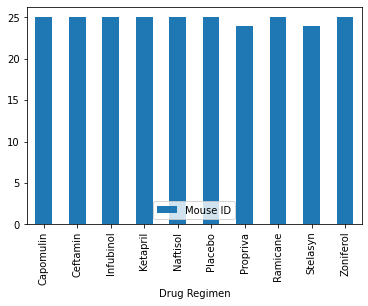

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#count number of unique mice used per drug study
mice_per_drug = grouped_drug_df.nunique()

#select the columns that will not be needed for the bar charts
cols=[1,2,3,4,5,6,7]

#create a new DF using just the 
mice_per_drug_after_dropping=mice_per_drug.drop(mice_per_drug.columns[cols],axis=1) 


mice_per_drug_after_dropping.plot.bar();






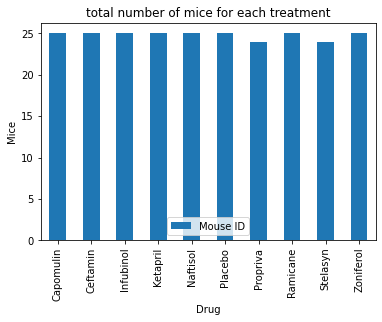

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_per_drug_after_dropping.plot(kind='bar')
plt.title("number of mice for each treatment")
plt.xlabel('Drug')
plt.ylabel('Mice')
plt.show()




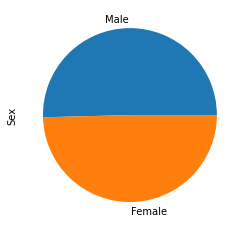

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = clean_data_df[["Mouse ID", "Sex"]]
mouse_unique= mouse_gender.drop_duplicates(["Mouse ID"], keep='first')

mouse_unique["Sex"].value_counts().plot.pie()



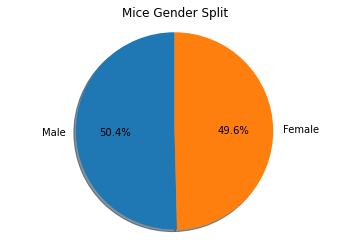

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender = clean_data_df[["Mouse ID", "Sex"]]
mouse_unique= mouse_gender.drop_duplicates(["Mouse ID"], keep='first')


#gender

plt.title("Mice Gender Split")
plt.pie(mouse_unique["Sex"].value_counts(), labels = ["Male", "Female"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()




#mouse_unique.head()



## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = clean_data_df.sort_values(["Mouse ID","Timepoint"])
tumor_vol_unique = tumor_vol.drop_duplicates(["Mouse ID"], keep='last')
tumor_vol_unique.head(15)



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Not necessary, all non-last timepoints have ben removed



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
907,a203,45,67.973419,2,Infubinol,Female,20,23
289,a251,45,65.525743,1,Infubinol,Female,21,25
1134,a262,45,70.717621,4,Placebo,Female,17,29
1487,a275,45,62.999356,3,Ceftamin,Female,20,28
736,a366,30,63.440686,1,Stelasyn,Female,16,29
1079,a401,45,66.794156,4,Zoniferol,Female,8,25
470,a411,45,38.407618,1,Ramicane,Male,3,22
480,a444,45,43.047543,0,Ramicane,Female,10,25
21,a457,10,49.783419,0,Ketapril,Female,11,30
663,a492,45,60.122011,1,Stelasyn,Male,20,25


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
#added Placebo to include more meaningful comparisons
drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin", "Placebo"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_df = []


 # Locate the rows which contain mice on each drug and get the tumor volumes
#loop searches for mice treated with one of the drugs of interest and retrieves the volume in mm3, adding it it to an expanding DF
    
for treatment in drug_treatments:
    treatment_list = tumor_vol_unique.loc[tumor_vol_unique["Drug Regimen"]== treatment]
# add subset  
    values = treatment_list["Tumor Volume (mm3)"]
    tumor_data_df.append(values)

    
# Determine outliers using upper and lower bounds    
    quart_values = values.quantile([.25,.5,.75])
    low_quart = quart_values[0.25]
    upper_quart = quart_values[0.75]
    iqr = upper_quart-low_quart  
    lower_bound = low_quart - (1.5*iqr)
    upper_bound = upper_quart + (1.5*iqr)



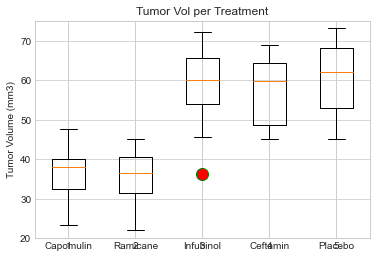

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest (I've added placebo to make comparisons more meaningful)


plt.xticks([1, 2, 3, 4,5], drug_treatments)
plt.title('Tumor Vol per Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim([20,75])
outlier_format = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(tumor_data_df, flierprops=outlier_format)
plt.show()

## Line and Scatter Plots

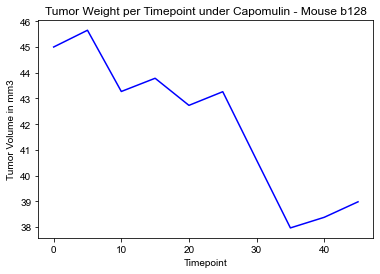

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_data = tumor_vol[tumor_vol["Drug Regimen"]== "Capomulin"]

Mouse_b128 = Capomulin_data[Capomulin_data["Mouse ID"]=="b128"]
Mouse_b128 = Mouse_b128[["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
Mouse_b128.set_index("Timepoint", drop=True,inplace=True)
Mouse_b128.head(5)



plt.plot(Mouse_b128["Tumor Volume (mm3)"], color="blue")
plt.style.use('seaborn-whitegrid')



plt.title("Tumor Weight per Timepoint under Capomulin - Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume in mm3")
plt.show()

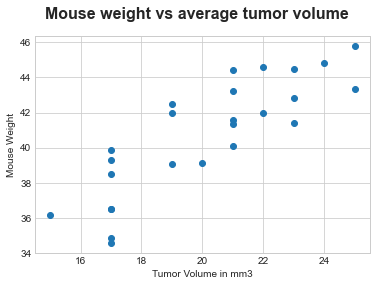

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_data_scatter = Capomulin_data[["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]
Capomulin_data_scatter.set_index("Mouse ID", drop=True,inplace=False)
Capomulin_data_grouped = Capomulin_data_scatter.groupby("Mouse ID")


plt.scatter(Capomulin_data_grouped["Weight (g)"].mean(),Capomulin_data_grouped["Tumor Volume (mm3)"].mean())
plt.xlabel("Tumor Volume in mm3")
plt.ylabel("Mouse Weight")
plt.suptitle("Mouse weight vs average tumor volume", fontsize=16, fontweight="bold")
plt.show()




## Correlation and Regression

Correlation coefficeint is 0.8419363424694717, which is strong


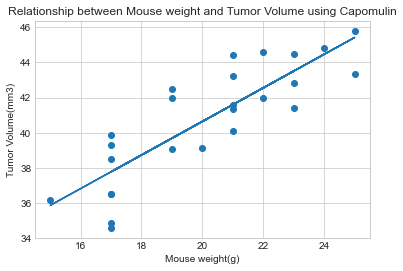

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


plt.scatter(Capomulin_data_grouped["Weight (g)"].mean(),Capomulin_data_grouped["Tumor Volume (mm3)"].mean())
plt.title("Relationship between Mouse weight and Tumor Volume using Capomulin")
plt.xlabel("Mouse weight(g)")
plt.ylabel("Tumor Volume(mm3)")
x_axis = Capomulin_data_grouped['Weight (g)'].mean()
y_axis = Capomulin_data_grouped["Tumor Volume (mm3)"].mean()
corr_coeff = st.pearsonr(x_axis, y_axis)[0] 

regression = stats.linregress(x_axis,y_axis)
regression_line = (regression[0]*x_axis) + regression[1]

plt.plot(x_axis,regression_line)

print(f"Correlation coefficeint is {corr_coeff}, which is strong")